In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [86]:
path = r'C:\Users\Gagan K M\Documents\Codespace\Amazon Analysis\Amazon Sale Report 1.csv'
df = pd.read_csv(path)

In [87]:
df.iloc[:, :10].head(3)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta


In [88]:
df.iloc[:, 10:20].head(3)

,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country
0,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN
1,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN
2,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN


In [89]:
df.iloc[:, 20:30].head(3)

,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,NaN,False,Easy Ship,NaN
1,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN


In [90]:
df.shape

(128975, 24)

In [91]:
df.describe()

,index,Qty,Amount,ship-postal-code
count,128975.000000,128975.000000,121180.000000,128942.000000
mean,64487.000000,0.904431,648.561465,463966.236509
std,37232.019822,0.313354,281.211687,191476.764941
min,0.000000,0.000000,0.000000,110001.000000
25%,32243.500000,1.000000,449.000000,382421.000000
50%,64487.000000,1.000000,605.000000,500033.000000
75%,96730.500000,1.000000,788.000000,600024.000000
max,128974.000000,15.000000,5584.000000,989898.000000


In [92]:
df.describe(include = 'object')

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,ship-country,promotion-ids,fulfilled-by,Unnamed: 22
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,128942,79822,39277,79925
unique,120378,91,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,1,5787,1,1
top,171-5057375-2831560,05-03-22,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship,False
freq,12,2085,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,128942,46100,39277,79925


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [94]:
df.isnull().sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64

In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'most_frequent', missing_values = np.nan)
#cols_to_be_transformed = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'promotion-ids', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
cols_to_be_transformed = df.select_dtypes(include = 'object')
for i in cols_to_be_transformed:
    df[[i]] = imputer.fit_transform(df[[i]])

In [96]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean', missing_values = np.nan)
#cols_to_be_transformed = ['Courier Status', 'currency', 'ship-city', 'ship-state', 'promotion-ids', 'ship-country', 'fulfilled-by', 'Unnamed: 22']
cols_to_be_transformed = df.select_dtypes(include = 'number')
for i in cols_to_be_transformed:
    df[[i]] = imputer.fit_transform(df[[i]])

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  float64
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  float64
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [98]:
df.isnull().sum()

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
Unnamed: 22           0
dtype: int64

In [99]:
df.iloc[:, :10].head(3)


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category
0,0.0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set
1,1.0,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta
2,2.0,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta


In [100]:
df.iloc[:, 10:20].head(3)


,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country
0,S,B09KXVBD7Z,Shipped,0.0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN
1,3XL,B09K3WFS32,Shipped,1.0,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN
2,XL,B07WV4JV4D,Shipped,1.0,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN


In [101]:
df.iloc[:, 20:30].head(3)

,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship,False
1,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,False
2,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship,False


In [102]:
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month_name()

In [103]:
df['Day'] = df['Date'].dt.day_name()

<Axes: xlabel='Date,Day'>

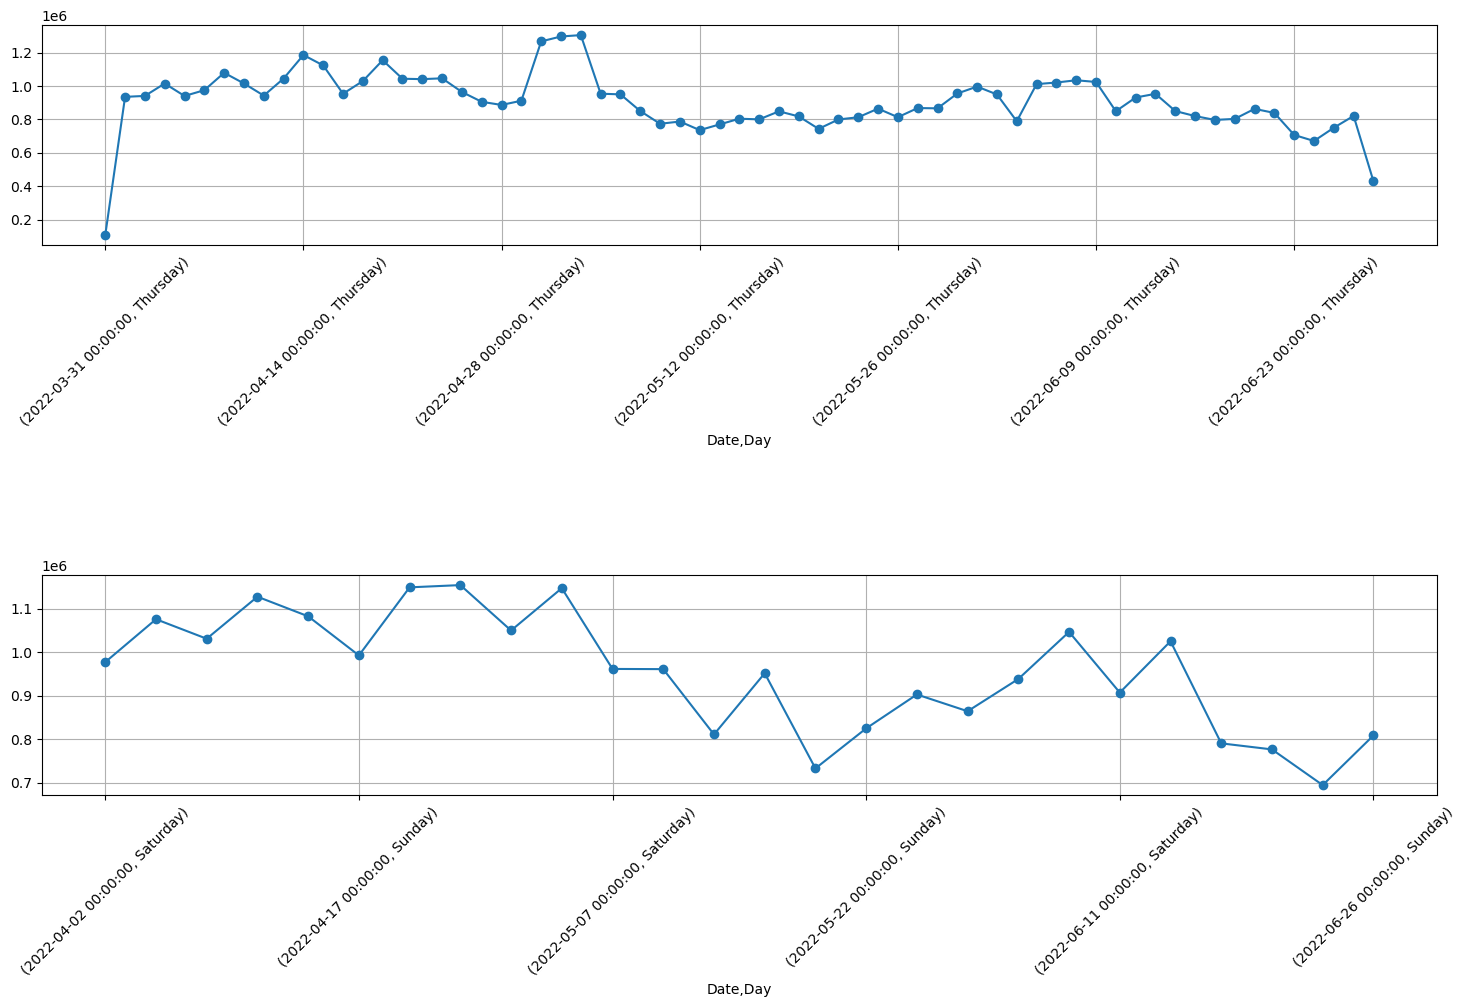

In [104]:
#How does the volume of orders differ on weekends vs weekdays?
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 1.5)
df[(df['Day'] != 'Sunday') & (df['Day'] != 'Saturday')].groupby(['Date', 'Day'])['Amount'].sum().astype(int).plot(kind = 'line', rot = 45, ax = axes[0], grid = True, marker = 'o')
df[(df['Day'] == 'Sunday') | (df['Day'] == 'Saturday')].groupby(['Date', 'Day'])['Amount'].sum().astype(int).plot(kind = 'line', rot = 45, ax = axes[1], grid = True, marker = 'o')

<Axes: xlabel='Date,Day'>

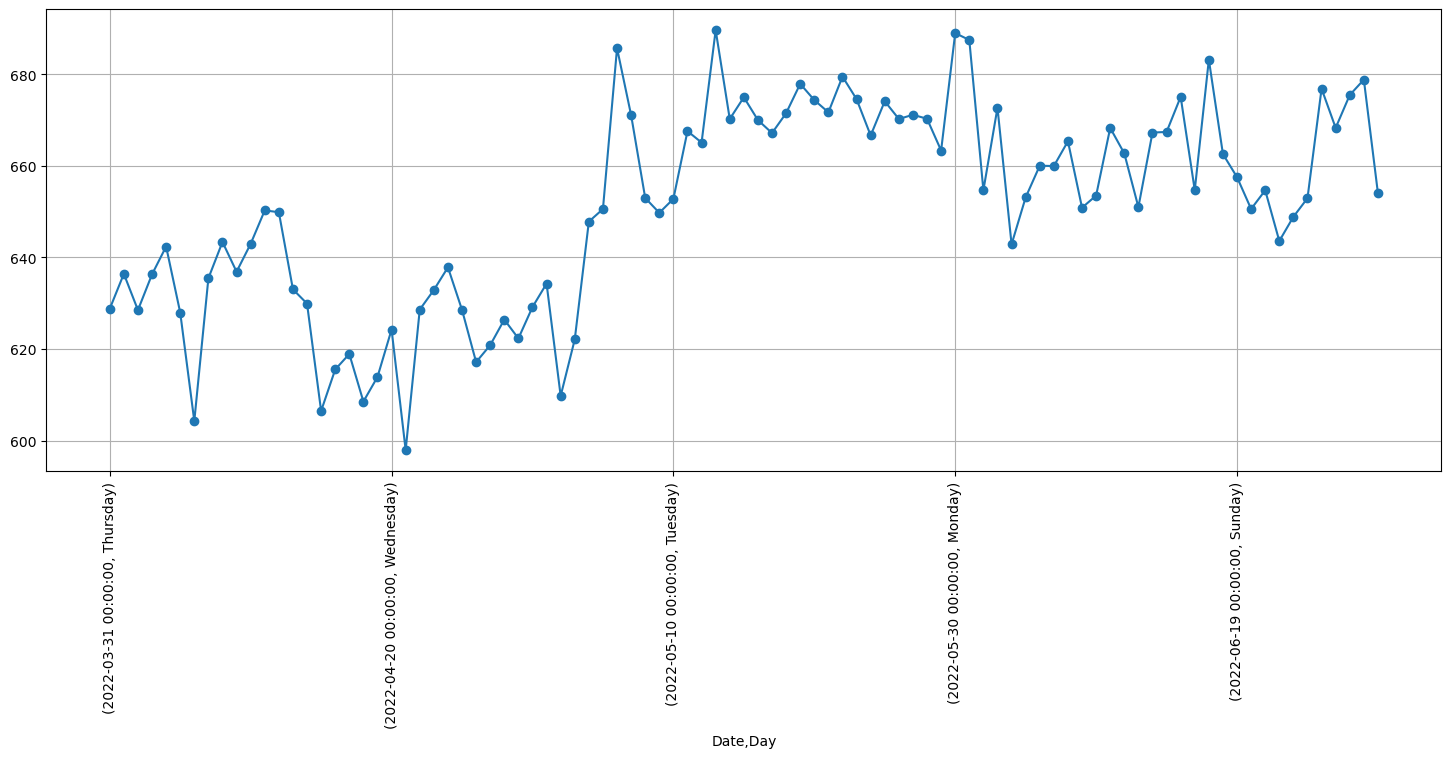

In [105]:
#What is the peak Day for placing orders? Is there any time-of-day trend?
df.groupby(['Date', 'Day'])['Amount'].mean().plot(kind = 'line', figsize = (18, 6), rot = 90, grid = True, marker = 'o')

<Axes: xlabel='Date,Day'>

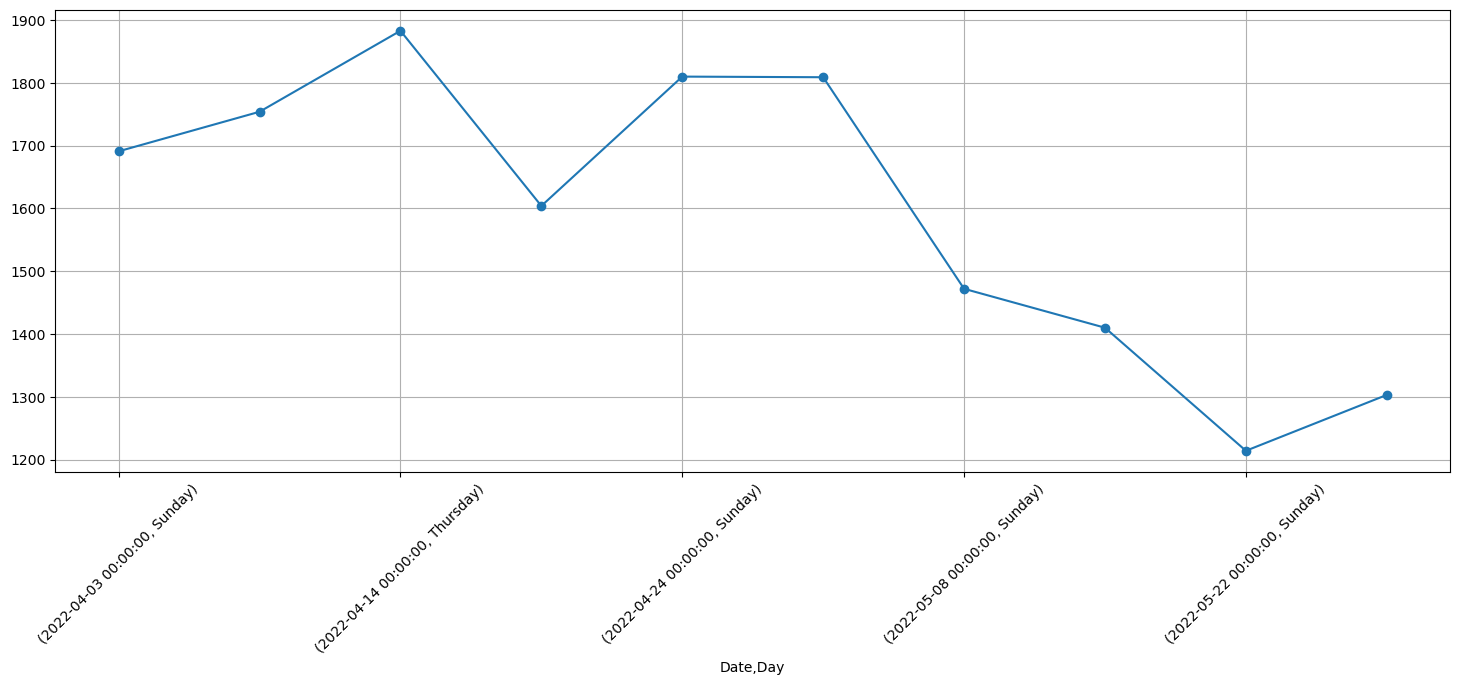

In [106]:
#How many orders were placed during holidays or special events? Are these orders different in terms of size or category?
holidays = ['2022-03-06', '2022-03-13', '2022-03-20', '2022-03-22', '2022-03-27', 
 '2022-04-03', '2022-04-10', '2022-04-14', '2022-04-17', '2022-04-24', 
 '2022-05-01', '2022-05-08', '2022-05-15', '2022-05-22', '2022-05-29']

df[(df['Date'].isin(holidays))].groupby(['Date', 'Day'])['Amount'].count().plot(kind = 'line', figsize = (18, 6), rot = 45, marker = 'o', grid = True)

<Axes: ylabel='Day'>

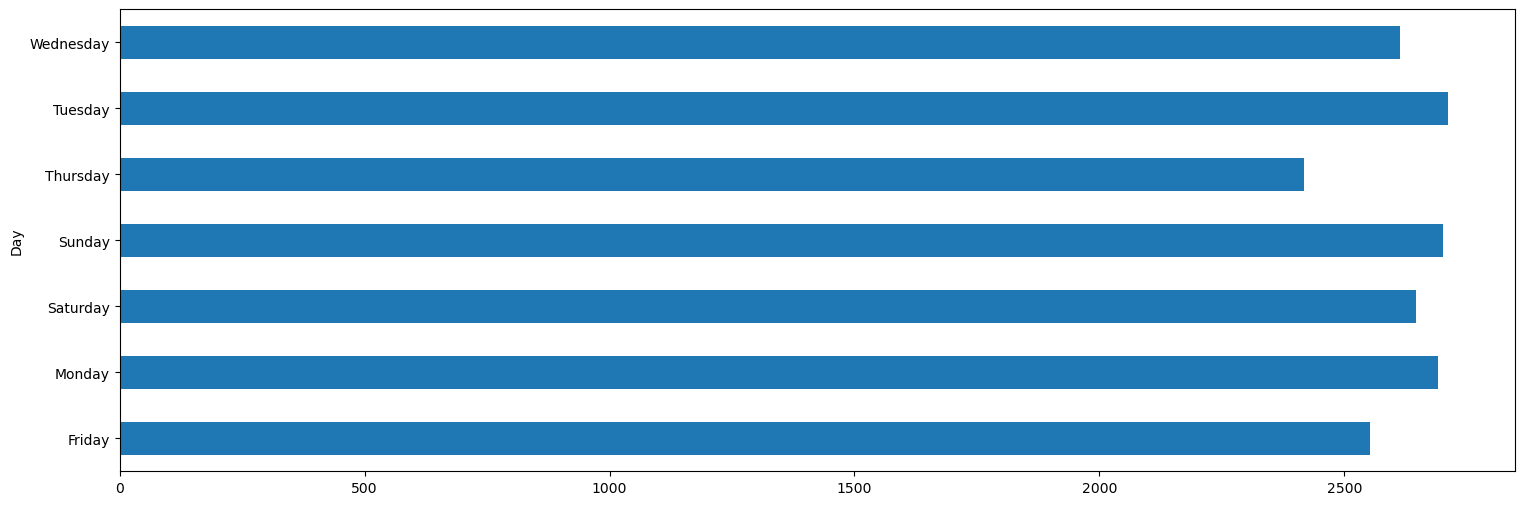

In [107]:
#What day of the week has the highest number of cancelled orders?
df[(df['Status'] == 'Cancelled')].groupby('Day')['Amount'].count().plot(kind = 'barh', rot = 0, figsize = (18, 6))

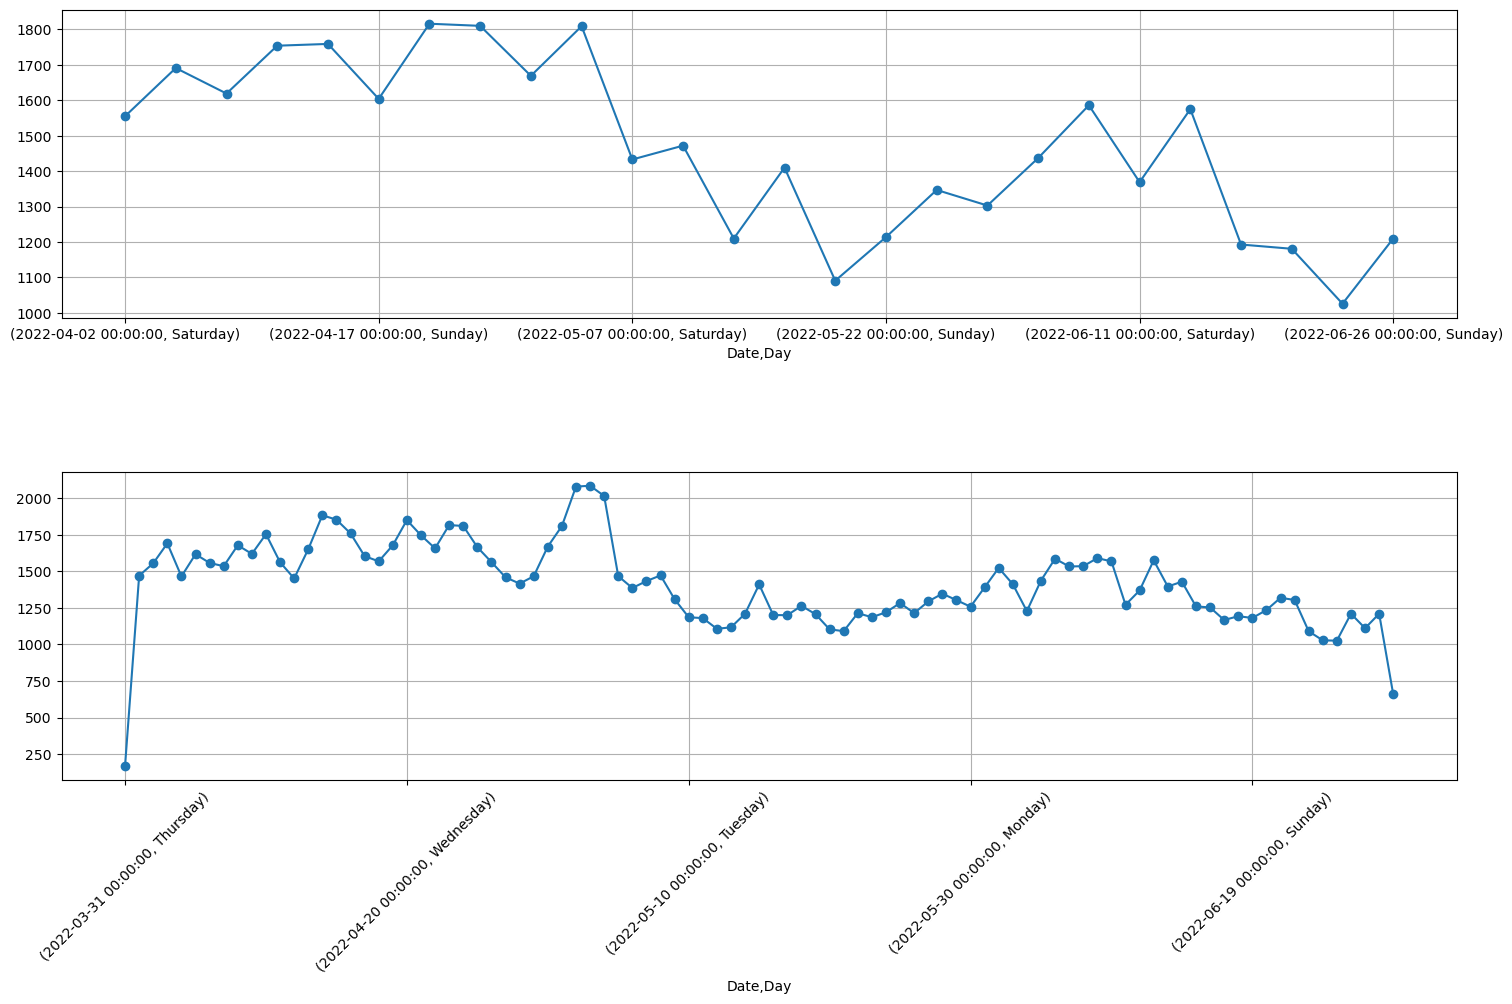

In [108]:
#Is there any significant difference in order volume between working days and weekends?
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 0.5)
df[(df['Day'] == 'Sunday') | (df['Day'] == 'Saturday')].groupby(['Date', 'Day'])['Amount'].count().plot(kind = 'line', ax = axes[0], rot = 0, grid = True, marker = 'o')
df[(df['Day'] != 'Sunday') | (df['Day'] != 'Saturday')].groupby(['Date', 'Day'])['Amount'].count().plot(kind = 'line', ax = axes[1], rot = 45, marker = 'o')
plt.grid(True)


In [109]:
# What percentage of orders are fulfilled via Easy Ship compared to merchant or Amazon fulfillment?
easy_ship_df = df[(df['fulfilled-by'] == 'Easy Ship')].groupby('Fulfilment')['fulfilled-by'].count().reset_index()
easy_ship_df['percentage'] = easy_ship_df['fulfilled-by'] / easy_ship_df['fulfilled-by'].sum() * 100
easy_ship_df

,Fulfilment,fulfilled-by,percentage
0,Amazon,89698,69.546811
1,Merchant,39277,30.453189


<Axes: xlabel='Date,Month,Day,Sales Channel '>

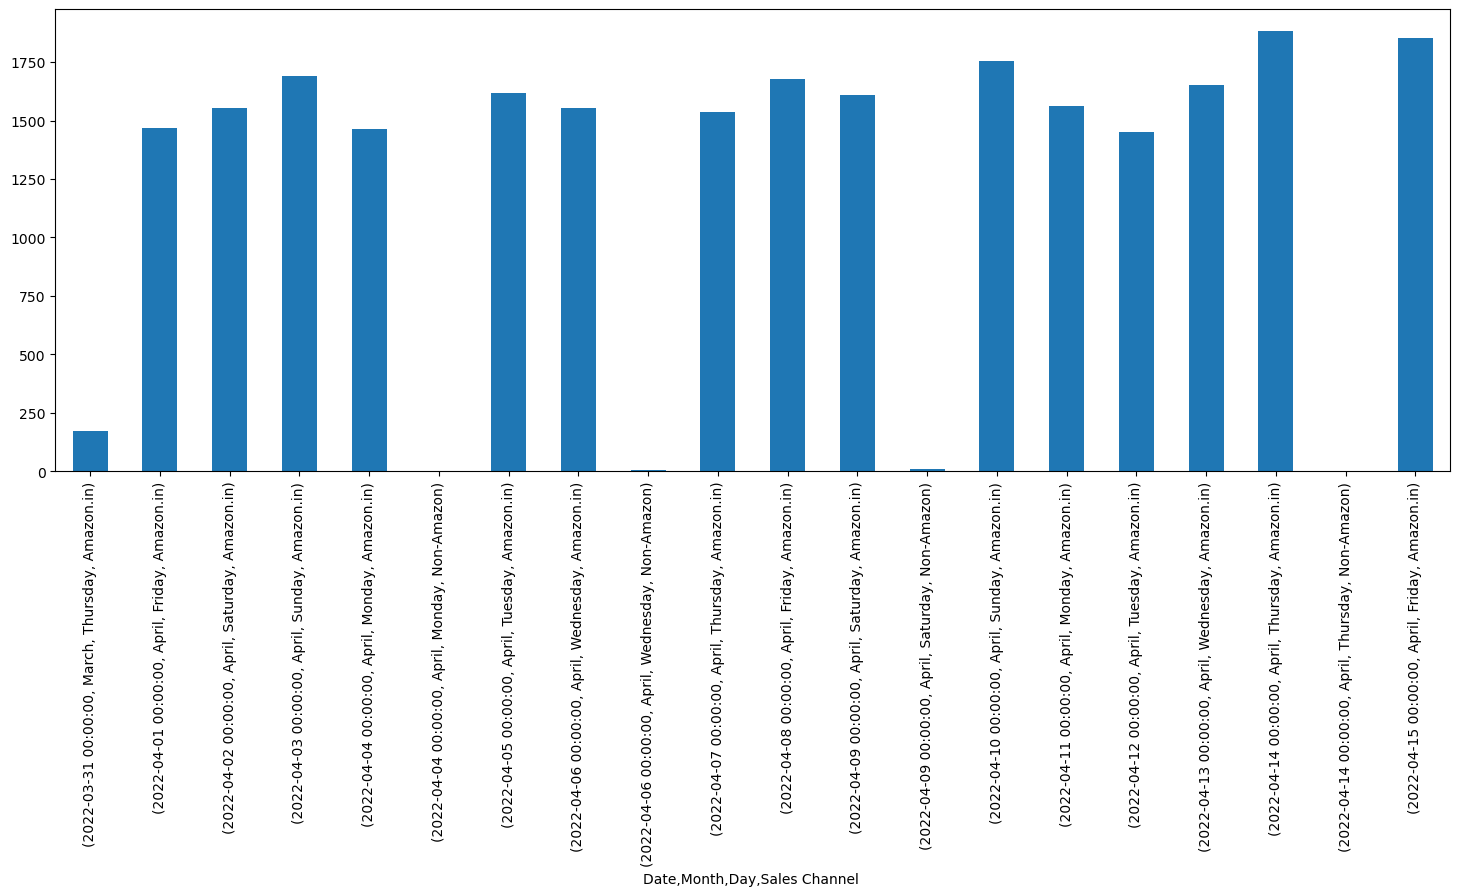

In [110]:
#Are there any noticeable seasonal variations in the preferred sales channel (e.g., Amazon.in vs Non-Amazon)?
df.groupby(['Date','Month', 'Day', 'Sales Channel '])['Amount'].count()[:20].plot(kind = "bar", figsize = (18, 6), rot = 90)

<Axes: xlabel='Date,Month,Day,Sales Channel '>

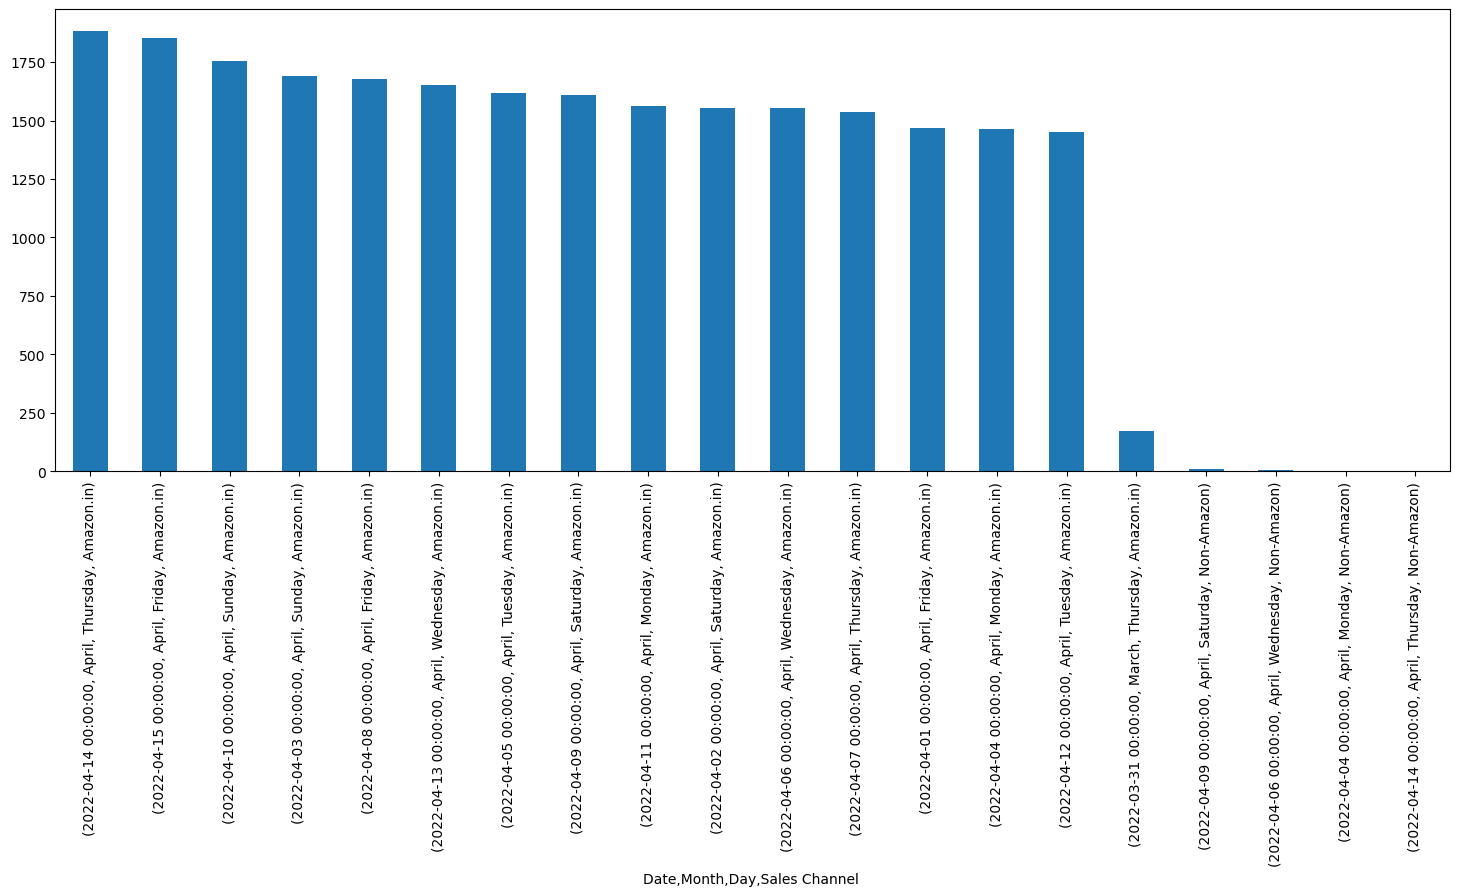

In [111]:
df.groupby(['Date','Month', 'Day', 'Sales Channel '])['Amount'].count()[:20].sort_values(ascending = False).plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Status'>

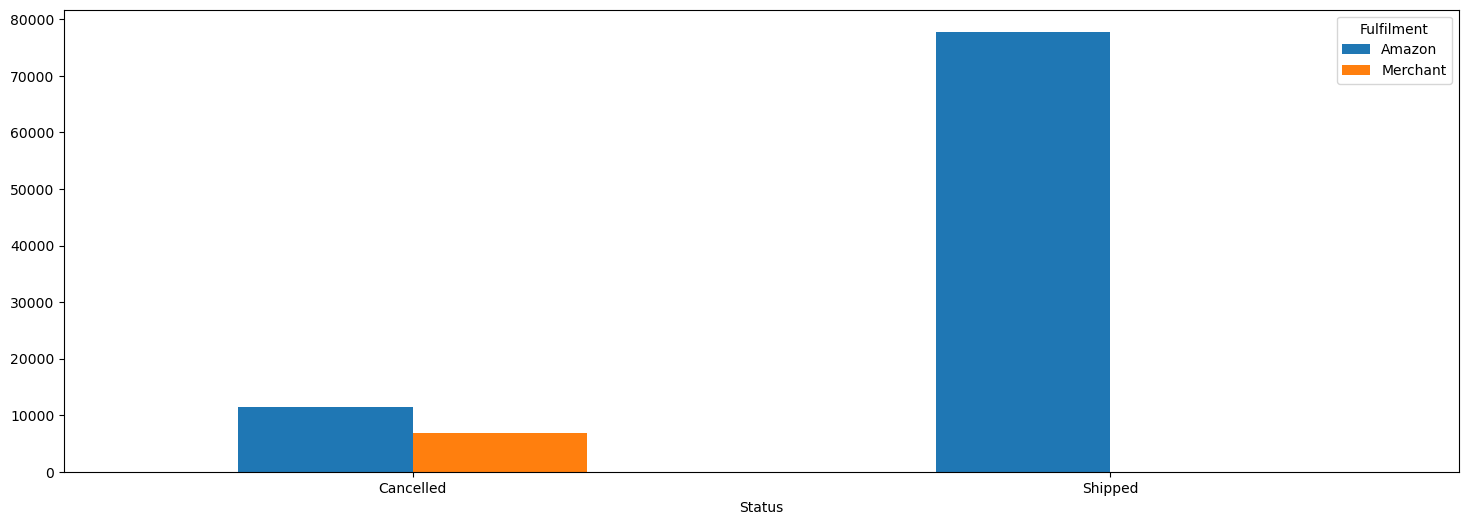

In [112]:
#Is there any relationship between the fulfillment method and the order status (e.g., "Cancelled" vs "Shipped")?
df[(df['Status'] == 'Cancelled') | (df['Status'] == 'Shipped')].groupby(['Fulfilment', 'Status'])['Amount'].count().unstack('Fulfilment').plot(kind = 'bar', figsize = (18, 6), rot = 0)

In [113]:
#How does the order cancellation rate vary across different sales channels?
cancellation_rate = df[df['Status'] == 'Cancelled'].groupby('Sales Channel ')['Amount'].count().reset_index()
cancellation_rate['Percentage'] = cancellation_rate['Amount'] / cancellation_rate['Amount'].sum() * 100
cancellation_rate

,Sales Channel,Amount,Percentage
0,Amazon.in,18331,99.994545
1,Non-Amazon,1,0.005455


In [114]:
#What is the correlation between order quantity and the total order amount (value)?
df['Qty'].corr(df['Amount'])

0.044359066469953454

<Axes: xlabel='Category'>

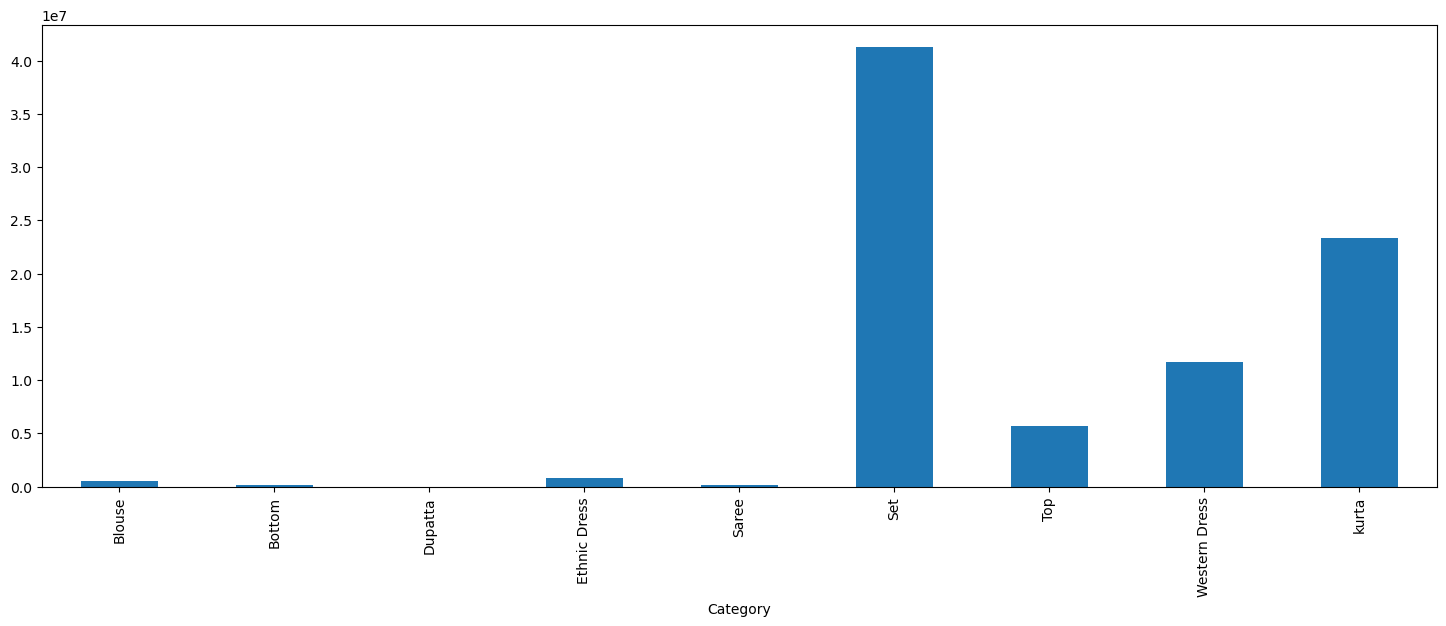

In [115]:
#Which product categories have the highest revenue per order?
df. groupby('Category')['Amount'].sum().astype(int).plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Category'>

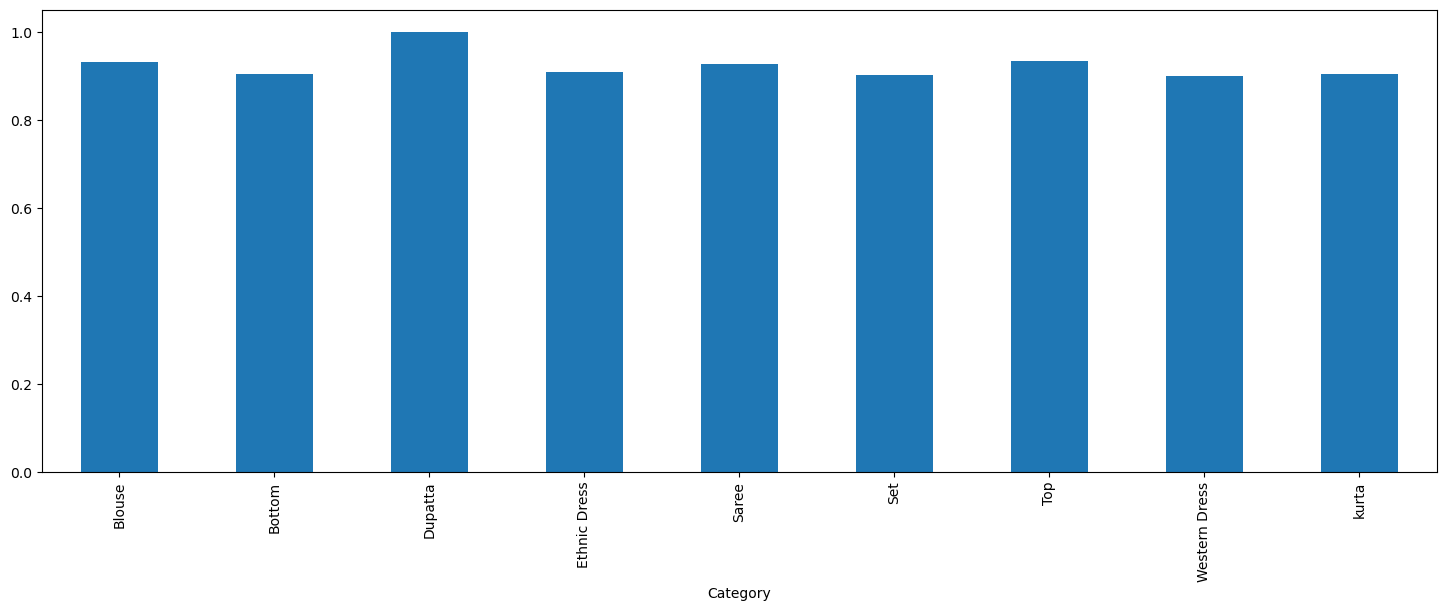

In [116]:
# How does the average order quantity vary between different categories or SKUs?
df.groupby('Category')['Qty'].mean().plot(kind = 'bar', figsize = (18, 6))

In [117]:
#Are there any correlations between product size (e.g., 'S', 'M', 'L') and order status?
size_order_status = df.loc[:, ['Size', 'Status']]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for i in size_order_status.columns:
    size_order_status[i] = encoder.fit_transform(size_order_status[i])
size_order_status['Size'].corr(size_order_status['Status'])

-0.019210214108013768

<Axes: xlabel='Category'>

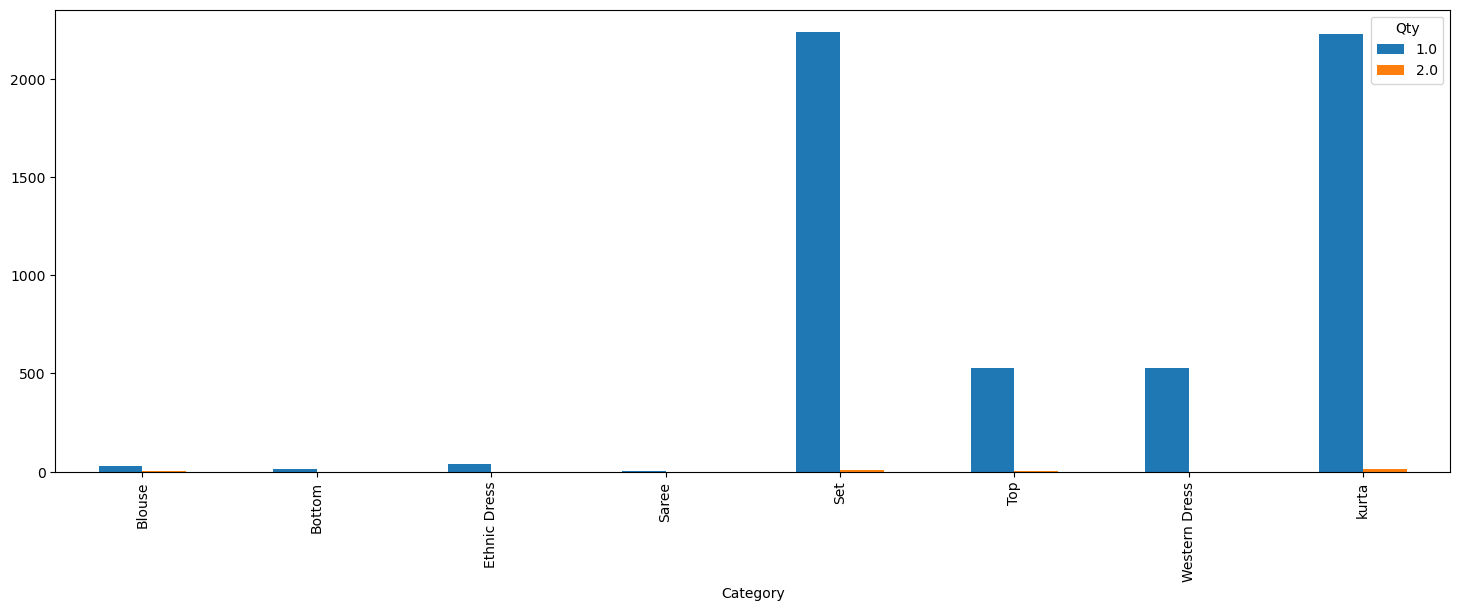

In [118]:
#Are larger orders (in terms of quantity) more likely to be cancelled?
df[(df['Status'] == 'Cancelled') & (df['Qty'] > 0.0)].groupby(['Category', 'Qty'])['Amount'].count().unstack('Qty').plot(kind = 'bar', figsize = (18, 6))

In [119]:
#What percentage of orders come from metro cities compared to smaller towns or rural areas?
indian_metropolitan_cities = ["Mumbai", "Bombay", "Delhi", "New Delhi", "Kolkata", "Calcutta", "Bengaluru", "Bangalore", "Chennai", "Madras", 
                              "Hyderabad", "Secunderabad", "Ahmedabad", "Pune", "Kochi", "Cochin", "Chandigarh", "Jaipur", "Surat", 
                              "Lucknow", "Indore", "Patna", "Nagpur", "Vadodara", "Baroda", "Coimbatore", "Visakhapatnam", "Vizag", "Bhopal"]

In [120]:
df['ship-city'] = df['ship-city'].str.lower()

<Axes: xlabel='ship-city'>

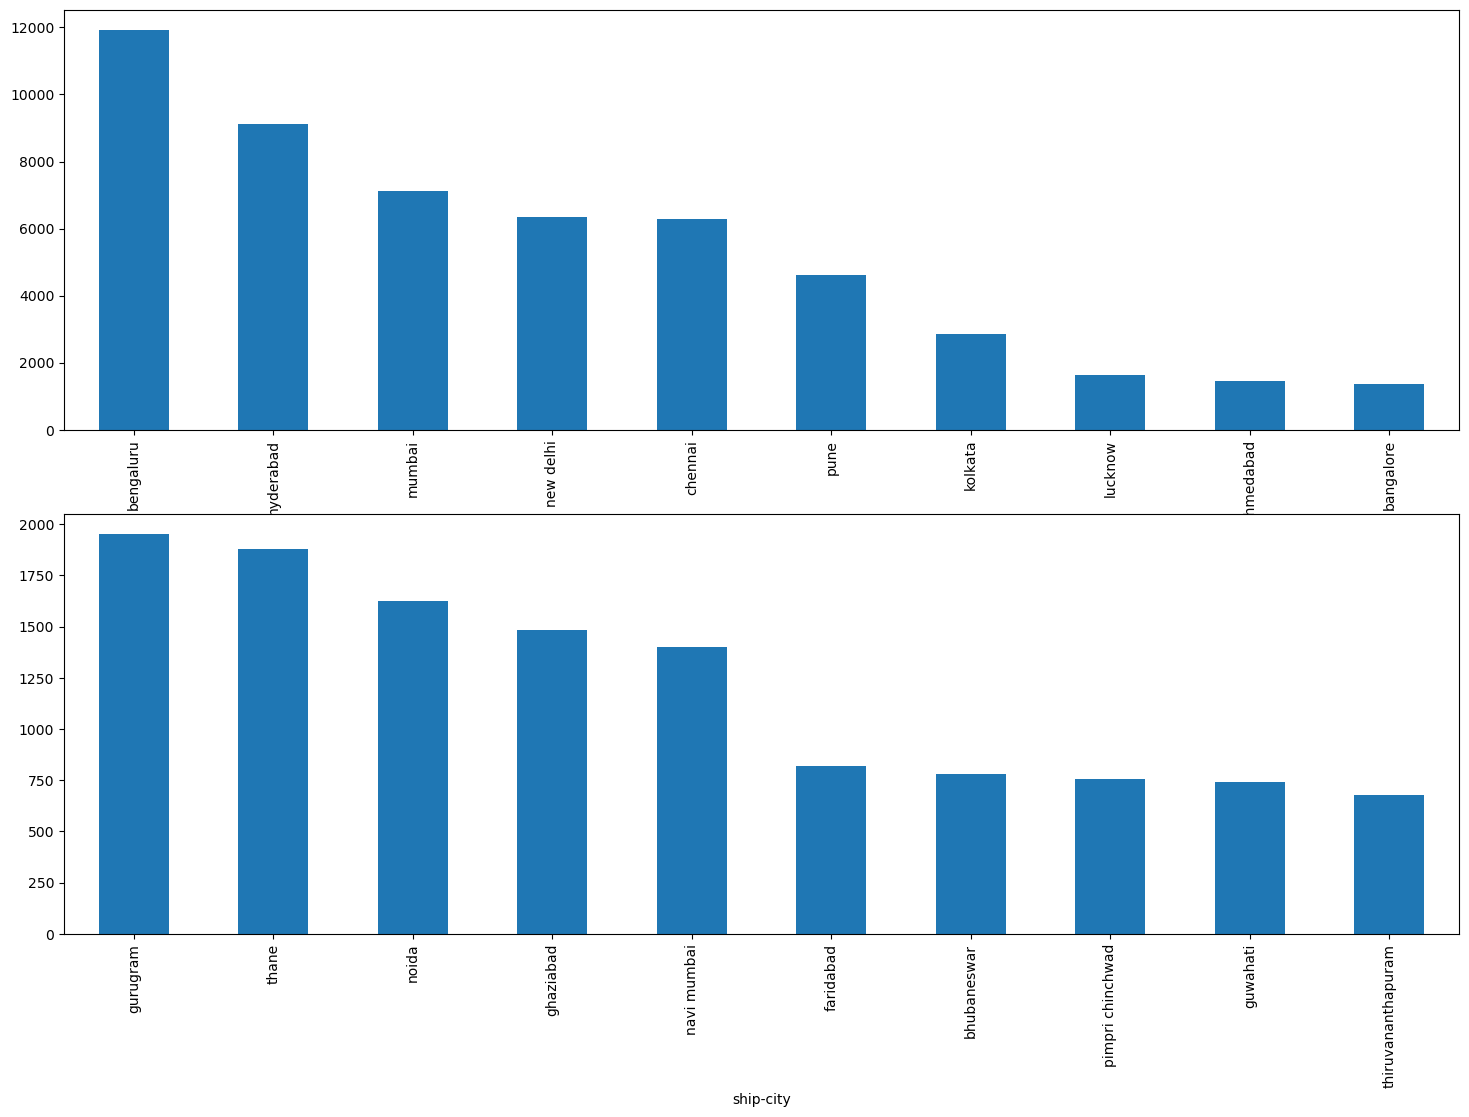

In [121]:
fig, axes = plt.subplots(2, 1, figsize = (18, 12))
metropolitan_df = df[(df['ship-city'].str.lower().isin([city.lower() for city in indian_metropolitan_cities]))]
metropolitan_df.groupby('ship-city')['Amount'].count().sort_values(ascending = False)[:10].plot(kind = 'bar', ax = axes[0])
non_metropolitan_df = df[~(df['ship-city'].str.lower().isin([city.lower() for city in indian_metropolitan_cities]))]
non_metropolitan_df.groupby('ship-city')['Amount'].count().sort_values(ascending = False)[:10].plot(kind = 'bar', ax = axes[1])

<Axes: xlabel='ship-state'>

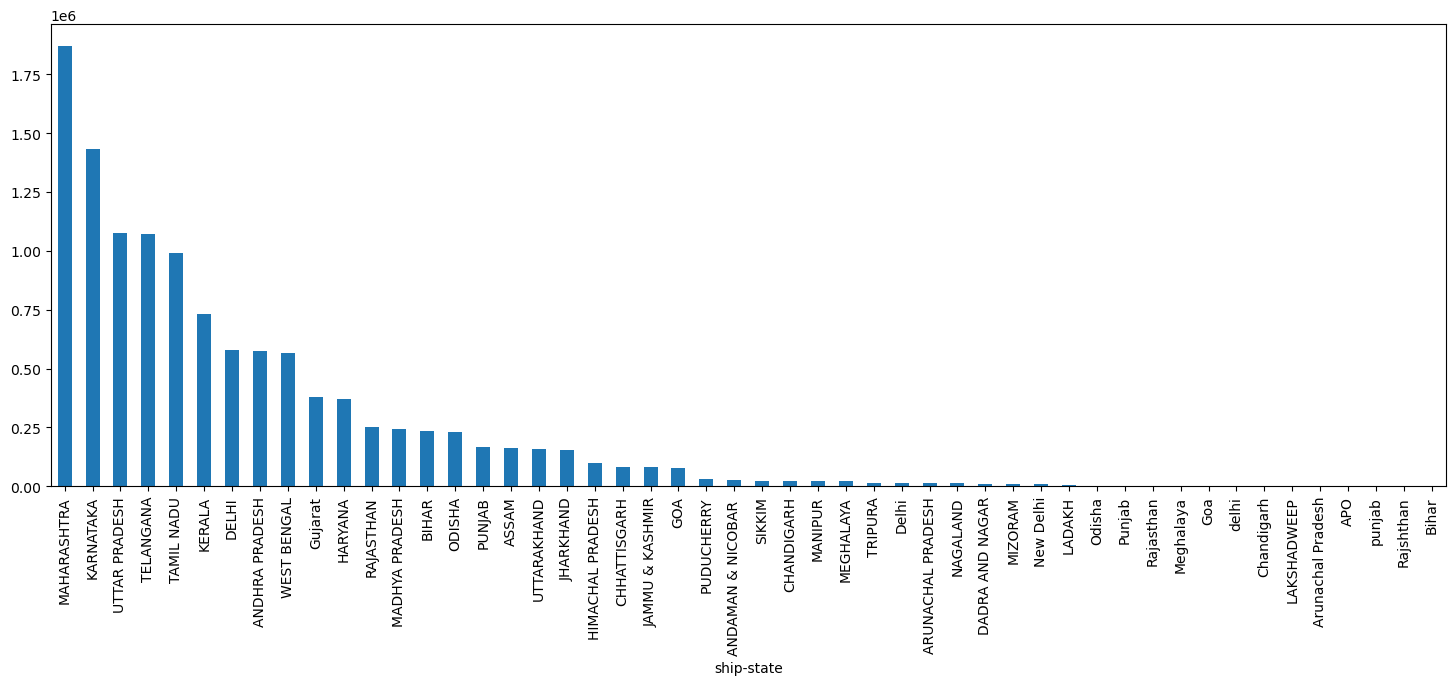

In [122]:
#Is there any noticeable difference in cancellation rates across different states or cities?
df[(df['Status'] == 'Cancelled')].groupby('ship-state')['Amount'].sum().astype(int).sort_values(ascending = False).plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='ship-state'>

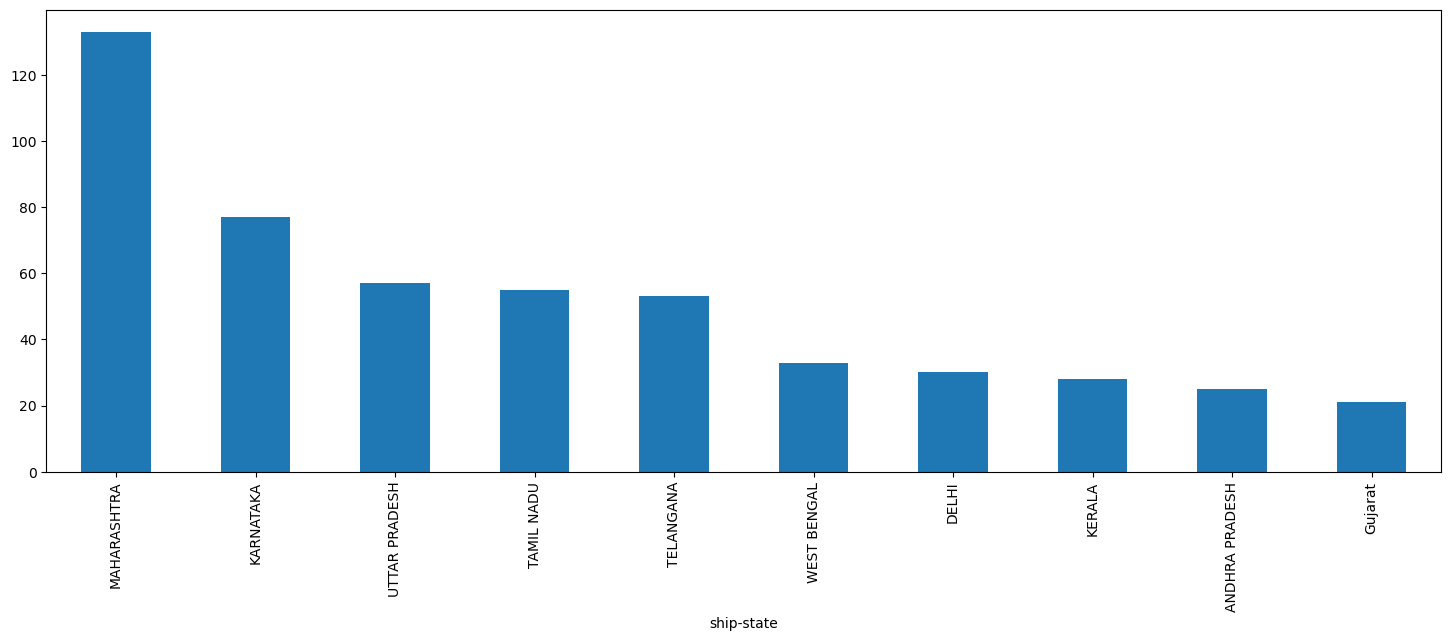

In [123]:
#Which states have the most delayed shipments, and which have the highest on-time delivery rate?
df[(df['Status'] == 'Pending')].groupby('ship-state')['Amount'].count().sort_values(ascending = False)[:10].plot(kind = "bar", figsize = (18, 6))

<Axes: xlabel='ship-state'>

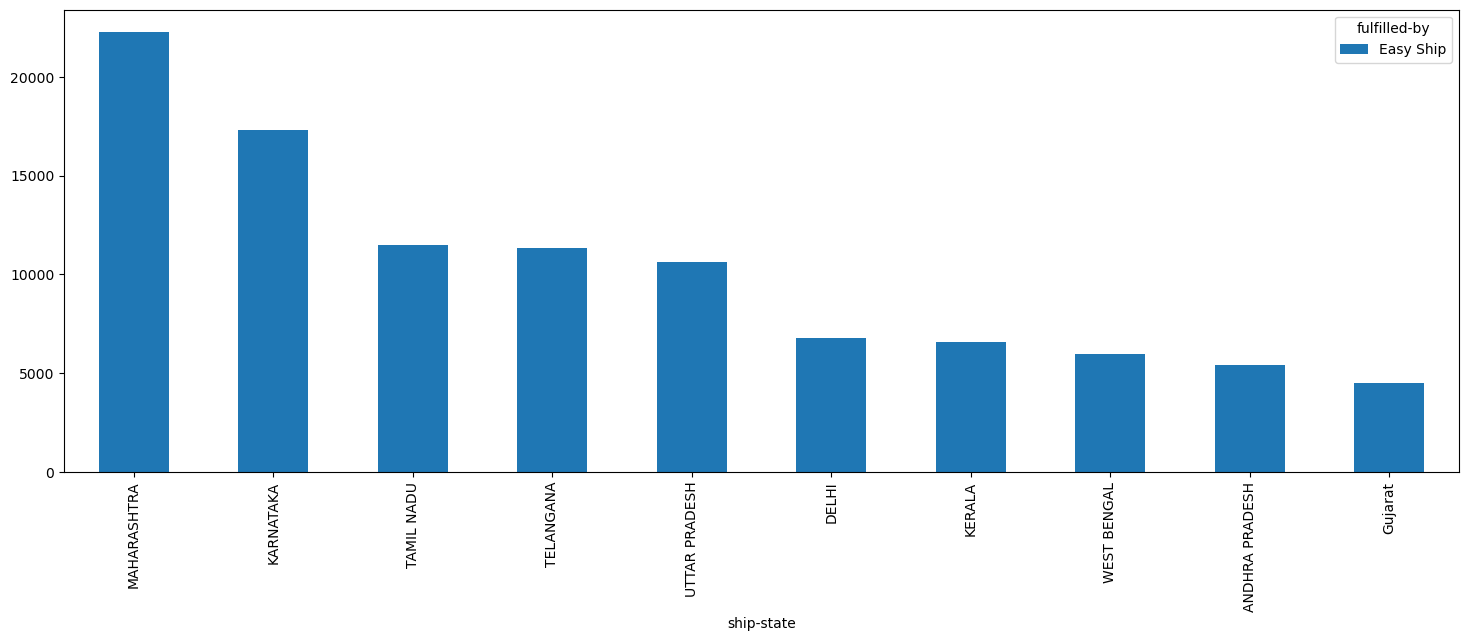

In [124]:
#Are some states more likely to use specific courier services than others?
df.groupby(['ship-state', 'fulfilled-by'])['fulfilled-by'].count().sort_values(ascending = False)[:10].unstack('fulfilled-by').plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Category,SKU,Status'>

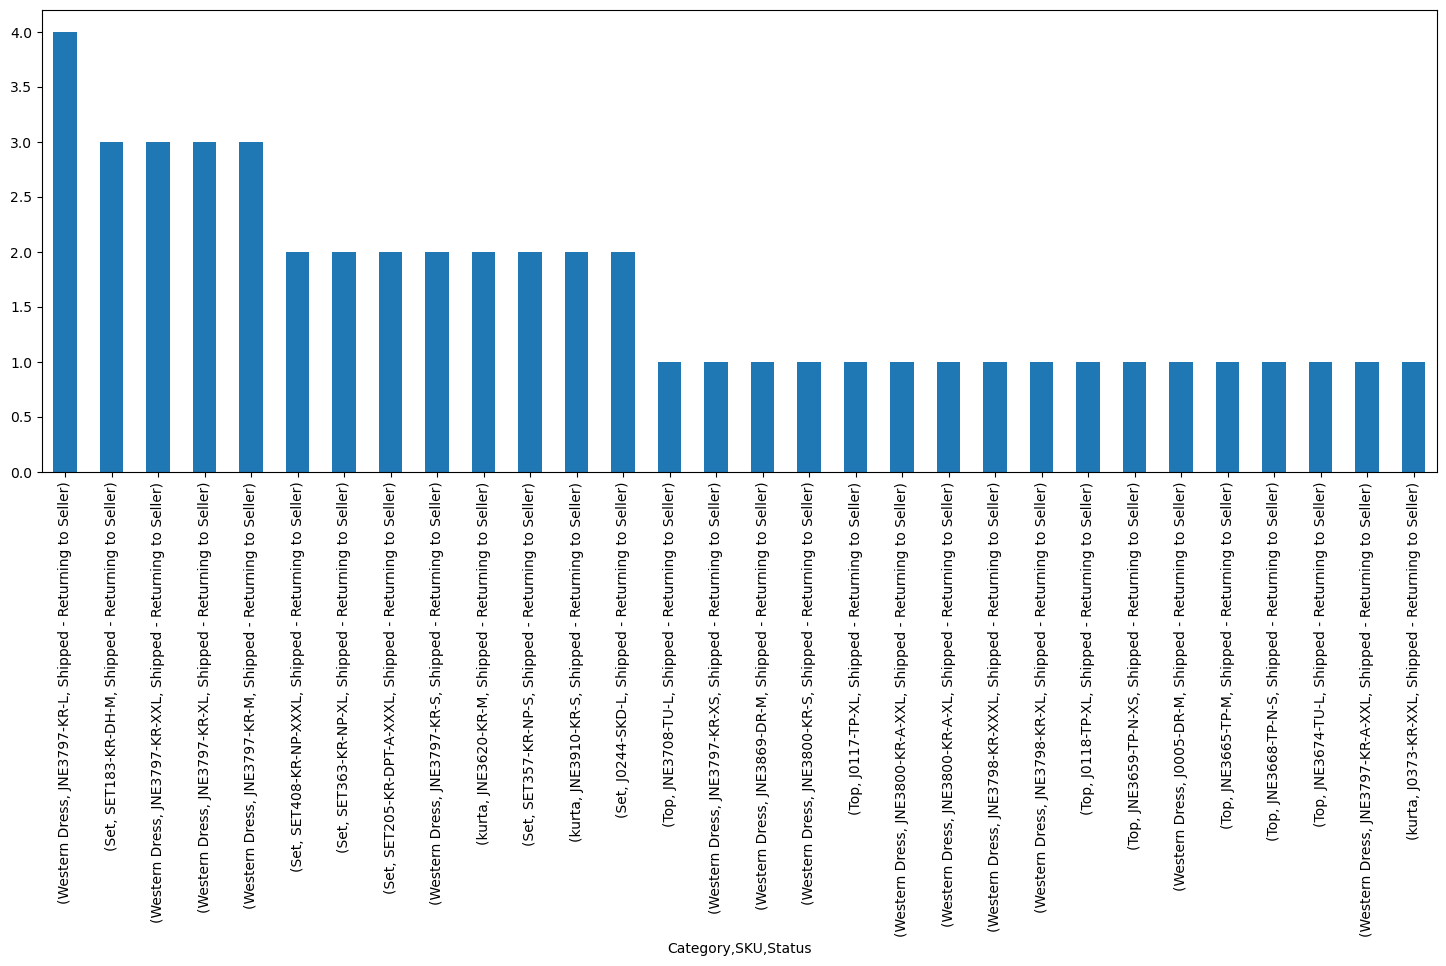

In [125]:
#What product SKUs have the highest return rate (status: "Shipped - Returned to Seller")?
df[(df['Status'] == 'Shipped - Returning to Seller')].groupby(['Category', 'SKU', 'Status'])['Amount'].count().sort_values(ascending = False)[:30].plot(kind = 'bar', figsize = (18, 6))


<Axes: xlabel='Month'>

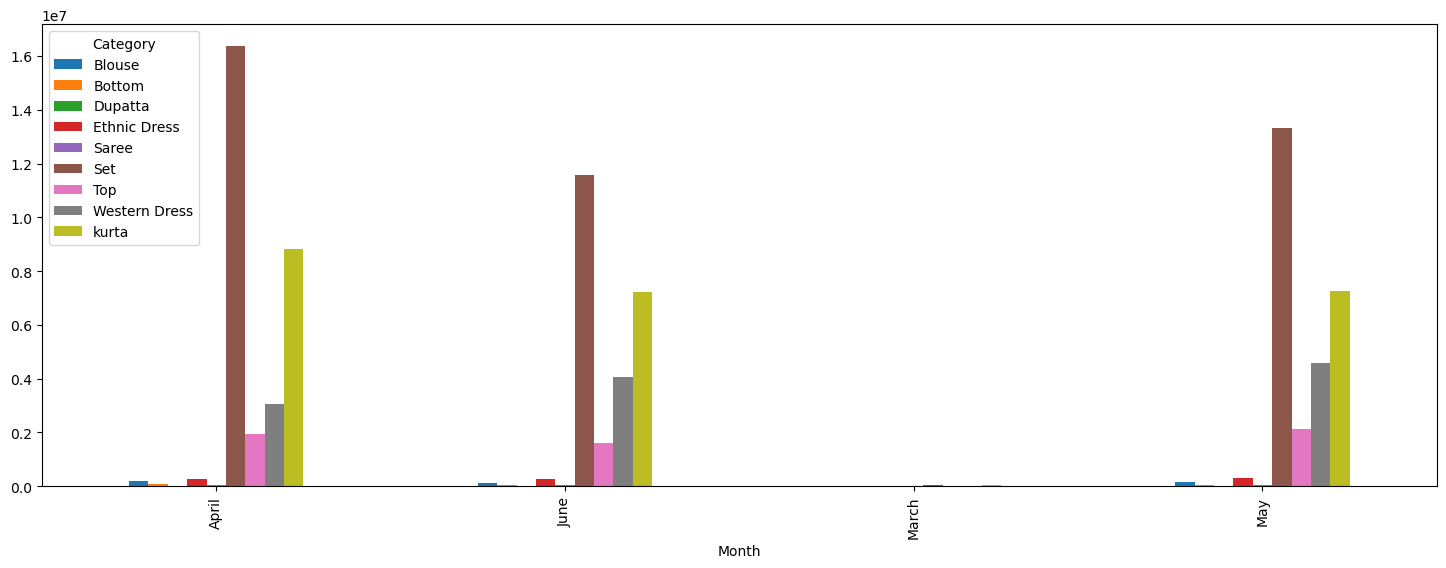

In [126]:
#Which categories tend to have higher order volumes during specific months (seasonal trends)?
df.groupby(['Category', 'Month'])['Amount'].sum().astype(int).sort_values(ascending = False).unstack('Category').plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='SKU,Category'>

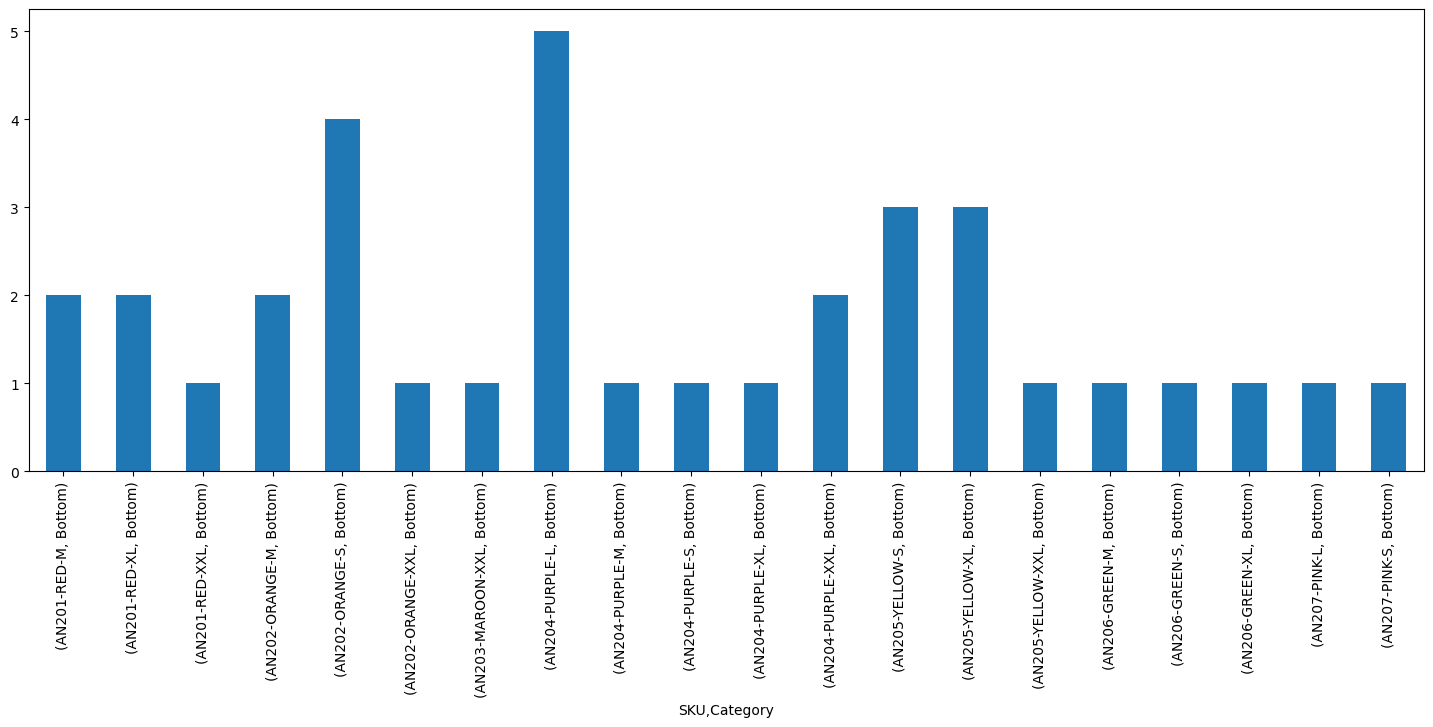

In [127]:
#What are the most frequently ordered product styles in terms of SKU?
df.groupby(['SKU', 'Category'])['Amount'].count()[:20].plot(kind = 'bar', figsize = (18, 6))

<Axes: xlabel='Category'>

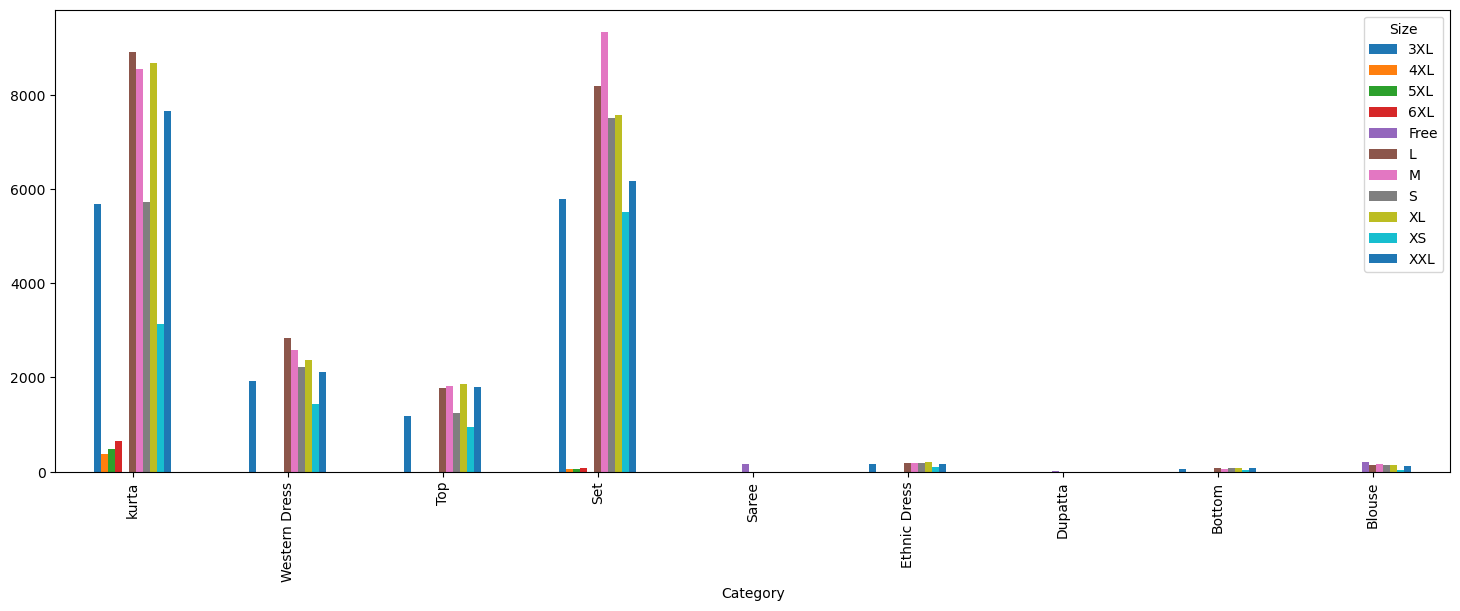

In [128]:
#How does product size distribution vary across different categories (e.g., "S", "M", "L", etc.)?
df.groupby(['Category', 'Size'])['Amount'].count().unstack('Size').sort_values(by = 'Category', ascending = False).plot(kind = 'bar', figsize = (18, 6))

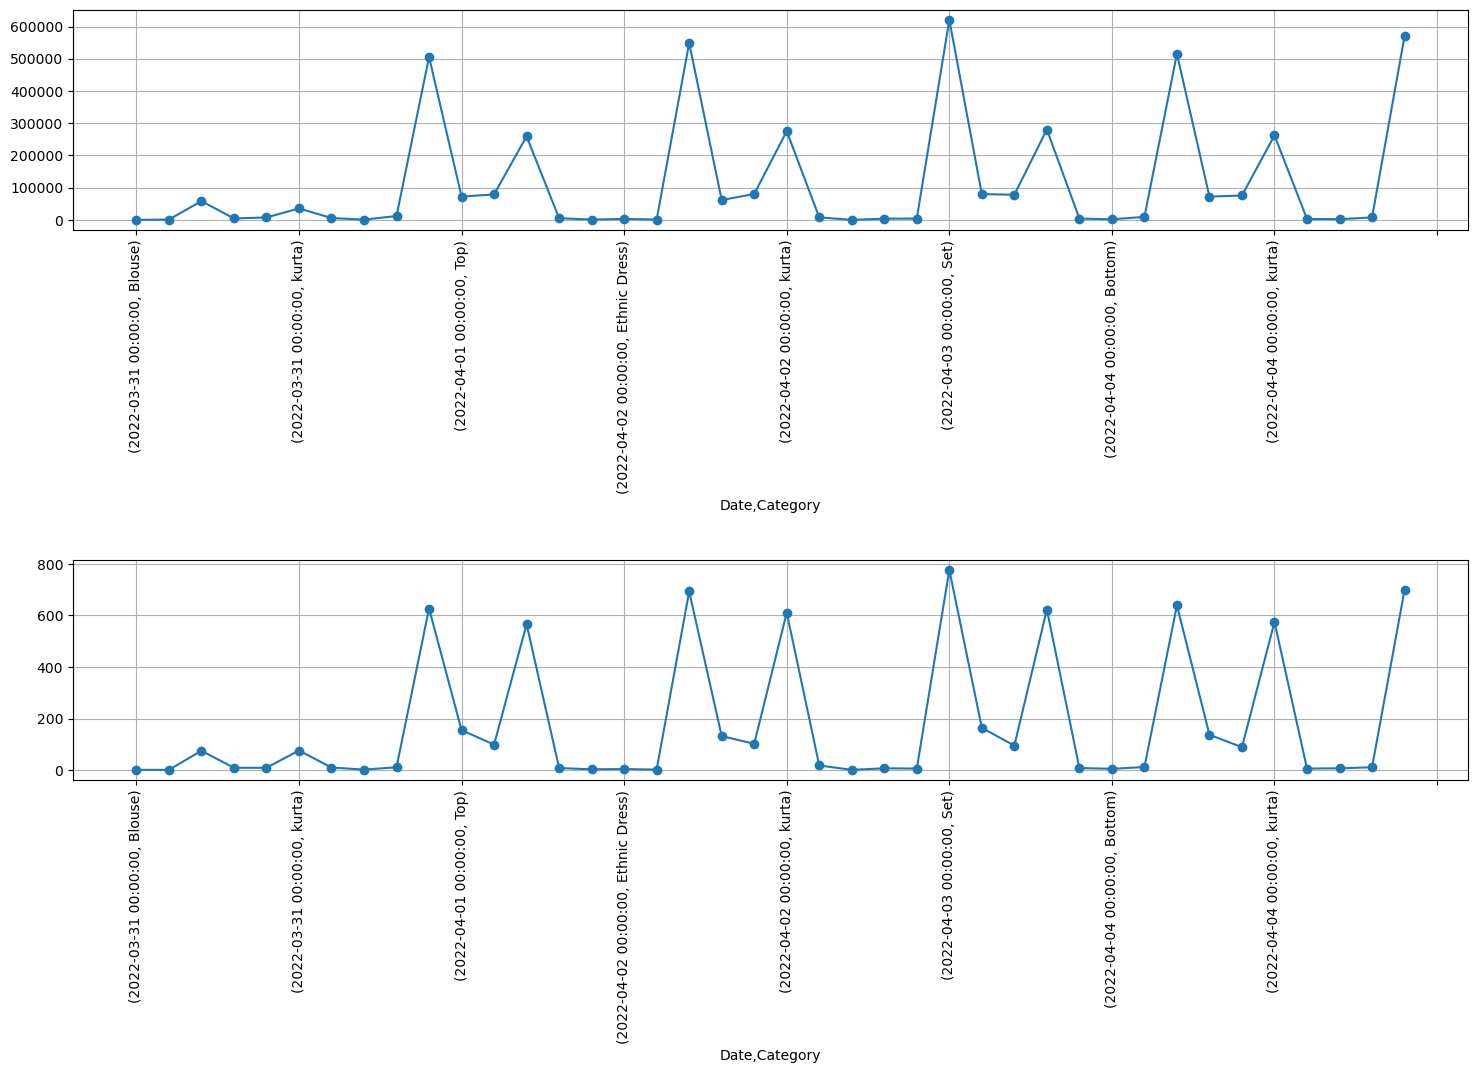

In [129]:
#How do order amounts vary by product category, and is there a category that generates consistently high-value orders?
fig, axes = plt.subplots(2, 1)
plt.subplots_adjust(hspace = 1.5)
df.groupby(['Date', 'Category'])['Amount'].sum().astype(int)[:40].plot(kind = 'line', figsize = (18, 10), rot = 90, ax = axes[0], grid = True, marker = 'o')
df.groupby(['Date', 'Category'])['Amount'].count().astype(int)[:40].plot(kind = 'line', figsize = (18, 10), rot = 90, ax = axes[1], grid = True, marker = 'o') # Rotate and align
plt.show()

<Axes: xlabel='ship-state'>

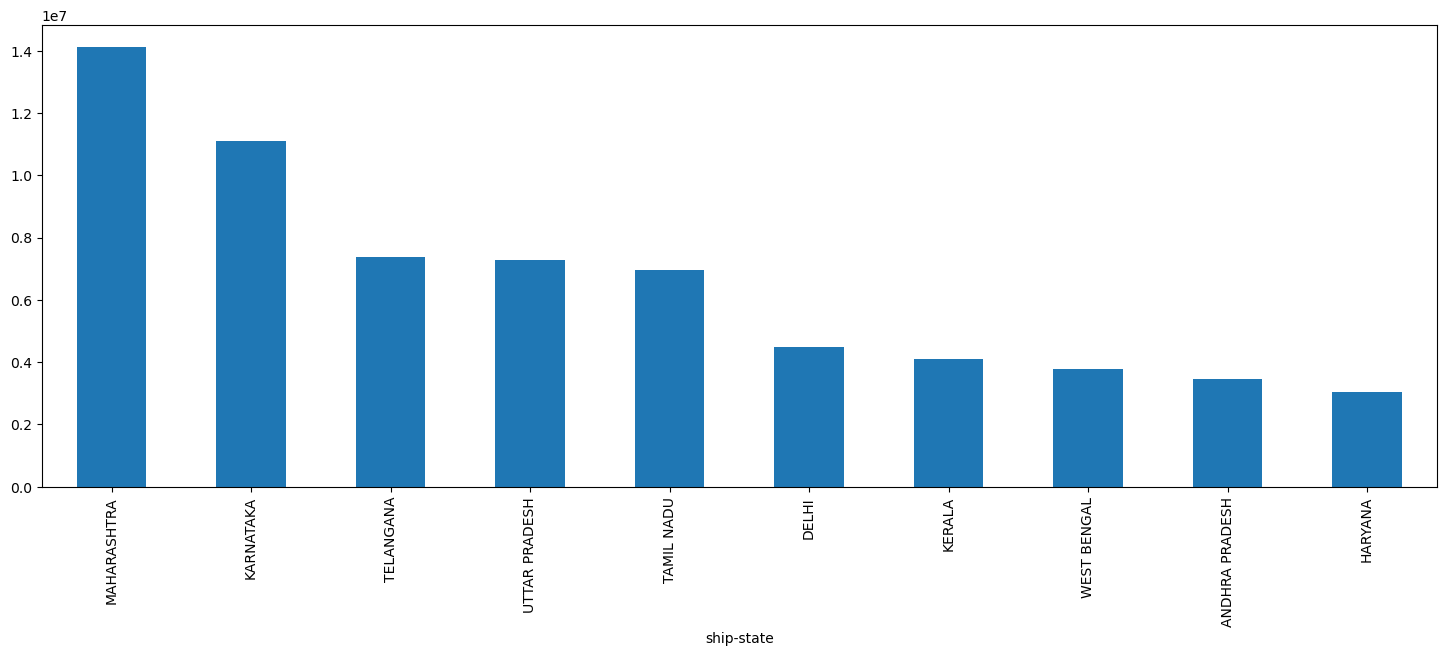

In [130]:
#Are there significant differences in pricing (Amount) between different cities or states?
df.groupby('ship-state')['Amount'].sum().astype(int).sort_values(ascending = False)[:10].plot(kind = 'bar', figsize = (18, 6))

In [131]:
#What is the distribution of order amounts? Are there more low-value or high-value orders?
order_vol_avg = round(df['Amount'].mean(), 2)
print(f"Initial Count is  {df['Amount'].count()}")
print(f"The Count of higher orders {df[(df['Amount'] > order_vol_avg)]['Amount'].count()}")
print(f"The Count of lower order {df[(df['Amount'] < order_vol_avg)]['Amount'].count()}")

Initial Count is  128975
The Count of higher orders 61626
The Count of lower order 67349


In [132]:
#Are there any noticeable pricing trends between B2B and B2C orders?
def transform(val):
    if val == False:
        return 'B2C'
    elif val == True:
        return 'B2B'
b2b_trends = df.groupby('B2B')['Amount'].count().reset_index()
b2b_trends['B2B'] = b2b_trends['B2B'].apply(lambda x : transform(x))
b2b_trends

,B2B,Amount
0,B2C,128104
1,B2B,871


<Axes: xlabel='B2B,Date'>

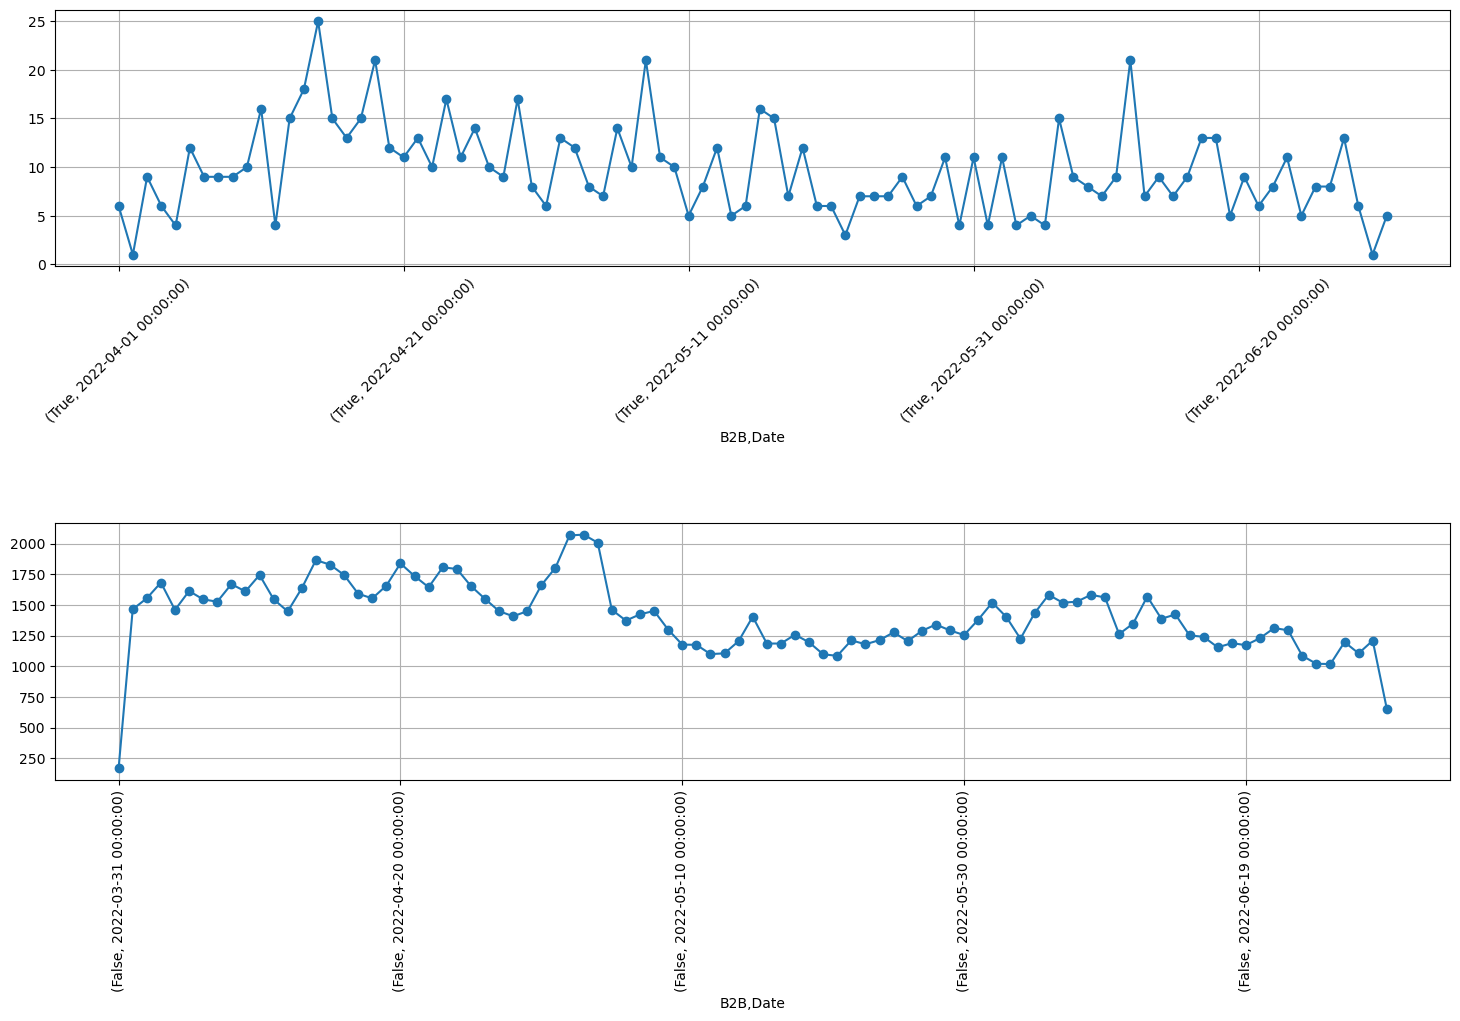

In [133]:
fig, axes = plt.subplots(2, 1)
plt.subplots_adjust(hspace = 1)
df[(df['B2B'] == True)].groupby(['B2B', 'Date'])['Amount'].count().plot(kind = 'line', figsize = (18, 10), rot = 45, marker = 'o', grid = True, ax = axes[0])
df[(df['B2B'] != True)].groupby(['B2B', 'Date'])['Amount'].count().plot(kind = 'line', figsize = (18, 10), rot = 90, marker = 'o', grid = True, ax = axes[1])

In [134]:
#What percentage of cancellations occur before the order is shipped vs after?
df[(df['Status'] == 'Cancelled')].groupby('Status')['Amount'].count().astype(int).reset_index()


,Status,Amount
0,Cancelled,18332


In [135]:
cancelled_df = df[(df['Status'] == 'Shipped')]
cancelled_df2 = cancelled_df.groupby('Courier Status')['Amount'].count().astype(int).reset_index()
cancelled_df2['Percentage'] = cancelled_df2['Amount'] / cancelled_df2['Amount'].sum() * 100
cancelled_df2[:1]

,Courier Status,Amount,Percentage
0,Cancelled,93,0.119531


In [136]:
df['Status'].unique()

array(['Cancelled', 'Shipped - Delivered to Buyer', 'Shipped',
       'Shipped - Returned to Seller', 'Shipped - Rejected by Buyer',
       'Shipped - Lost in Transit', 'Shipped - Out for Delivery',
       'Shipped - Returning to Seller', 'Shipped - Picked Up', 'Pending',
       'Pending - Waiting for Pick Up', 'Shipped - Damaged', 'Shipping'],
      dtype=object)

In [137]:
#Which order statuses are most commonly associated with cancellations (e.g., "Shipped - Lost in Transit")?
df[(df['Courier Status'] == 'Cancelled')].groupby(['Status', 'Courier Status'])['Amount'].count()


Status     Courier Status
Cancelled  Cancelled         5840
Pending    Cancelled            2
Shipped    Cancelled           93
Name: Amount, dtype: int64

<Axes: xlabel='Fulfilment'>

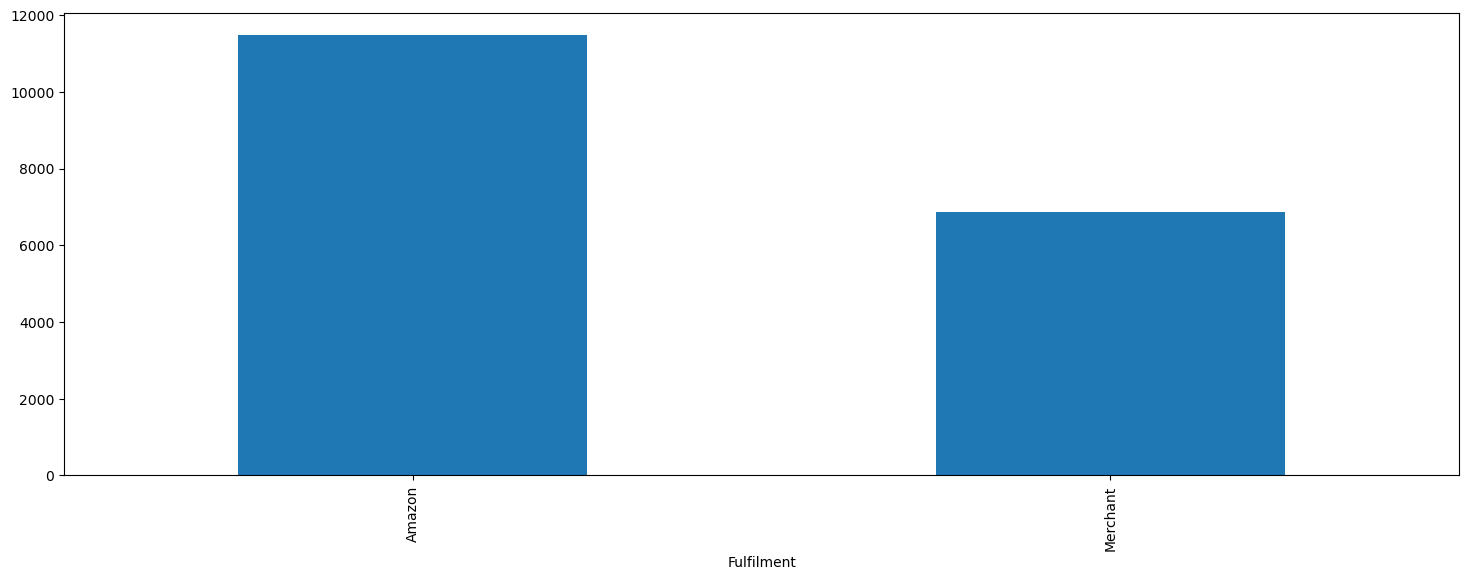

In [138]:
#How do cancellation rates differ between "Merchant" vs "Amazon" fulfillment?
df[(df['Status'] == 'Cancelled')].groupby('Fulfilment')['Amount'].count().plot(kind = 'bar',figsize = (18, 6))

In [139]:
#Do orders with larger quantities tend to have higher cancellation rates?
avg_of_quantity = df['Qty'].mean()
df[(df['Qty'] > avg_of_quantity)].groupby('Status')['Amount'].count()[:1]

Status
Cancelled    5631
Name: Amount, dtype: int64

In [140]:
df[(df['Qty'] > avg_of_quantity) & (df['Courier Status'] == 'Cancelled')].groupby('Courier Status')['Amount'].count()
#its none, the result is none

Series([], Name: Amount, dtype: int64)

<Axes: xlabel='Date,currency,ship-state'>

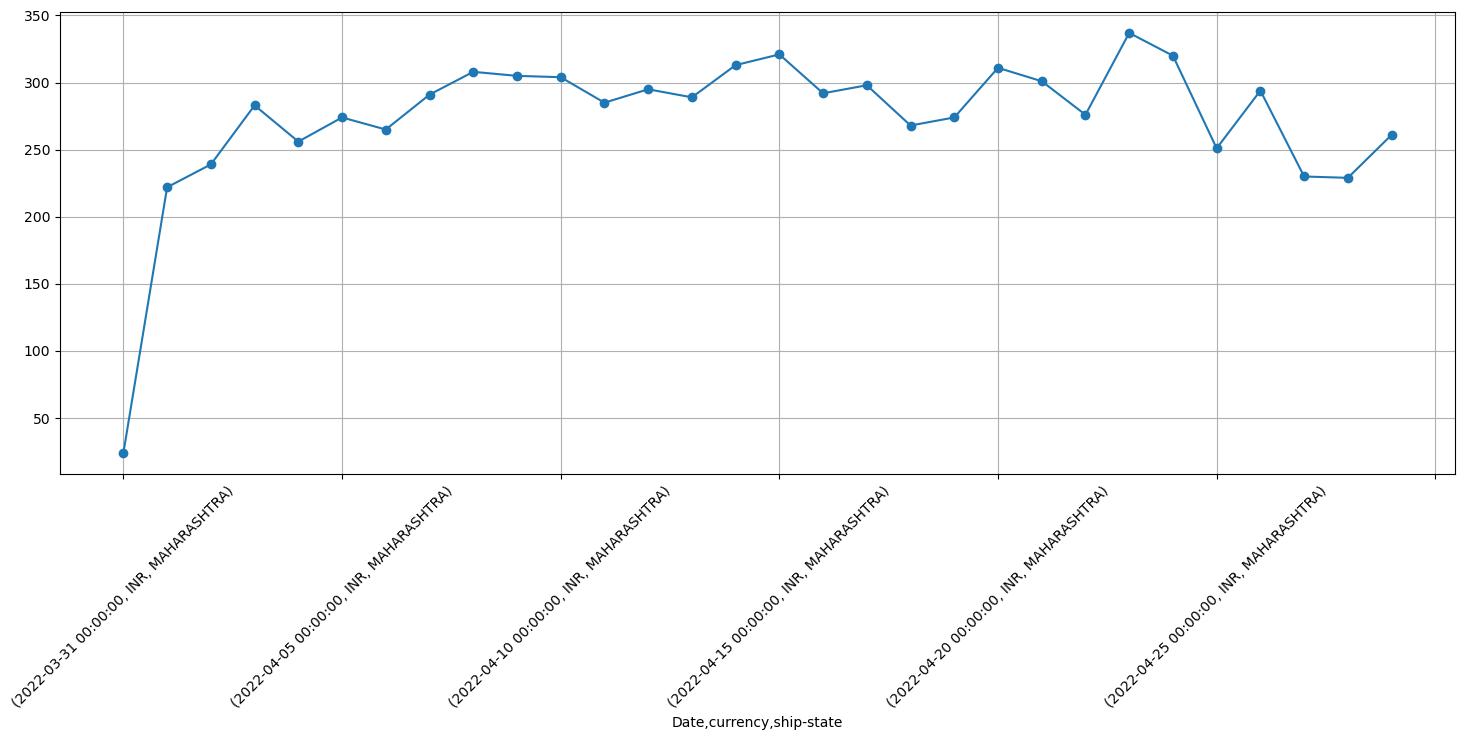

In [141]:
#How does the currency (INR) fluctuate across different order amounts, and is there any noticeable pricing difference in specific cities or states?
df[(df['ship-state'] == 'MAHARASHTRA')].groupby(['Date', 'currency', 'ship-state'])['Amount'].count()[:30].plot(kind = 'line', figsize= (18, 6), rot = 45, marker = 'o', grid = True)

<Axes: xlabel='Month,Date'>

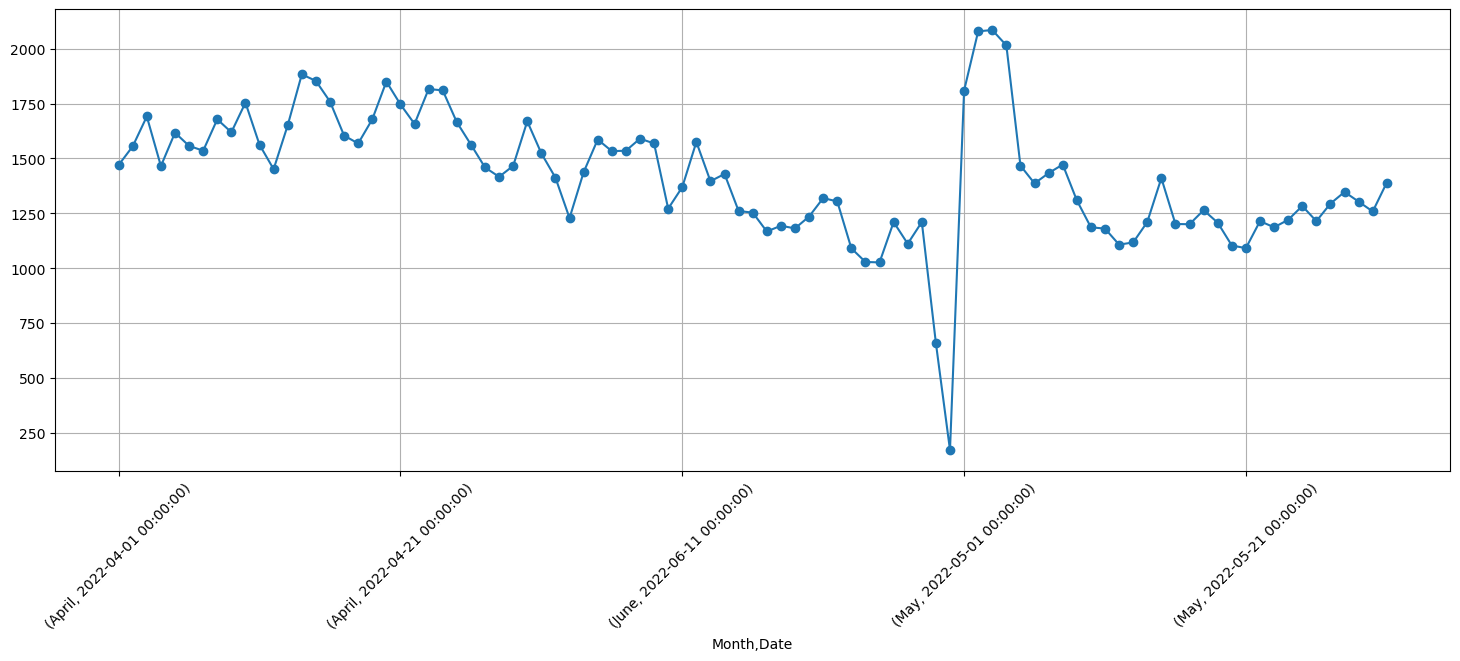

In [142]:
#Are there any patterns of orders being placed in specific months, which could indicate a change in exchange rates or promotional pricing?
df.groupby(['Month', 'Date'])['Amount'].count().plot(kind = 'line', figsize = (18, 6), grid = True, marker = 'o', rot = 45)

In [143]:
#What percentage of the total revenue is from B2B orders versus B2C orders?
def transform(x):
    if x == True:
        return 'B2C'
    else:
        return 'B2B'
b2b_df = df.groupby('B2B')['Amount'].sum().reset_index()
b2b_df['B2B'] = b2b_df['B2B'].apply(lambda x : transform(x))
b2b_df

,B2B,Amount
0,B2B,8.303883e+07
1,B2C,6.093805e+05


In [144]:
#Are B2B orders typically higher in quantity or amount than B2C orders?
def transform(x):
    if x == True:
        return 'B2C'
    else:
        return 'B2B'
b2b_df = df.groupby('B2B')['Qty'].count().reset_index()
b2b_df['B2B'] = b2b_df['B2B'].apply(lambda x : transform(x))
b2b_df   


,B2B,Qty
0,B2B,128104
1,B2C,871


In [145]:
#What is the cancellation rate for B2B orders compared to B2C orders?
def transform(x):
    if x == True:
        return 'B2C'
    else:
        return 'B2B'
b2b_df = df[(df['Status'] == 'Cancelled') & (df['Courier Status'] == 'Cancelled')].groupby('B2B')['Amount'].count().reset_index()
b2b_df['B2B'] = b2b_df['B2B'].apply(lambda x : transform(x))
b2b_df

,B2B,Amount
0,B2B,5818
1,B2C,22


<Axes: xlabel='Date,currency'>

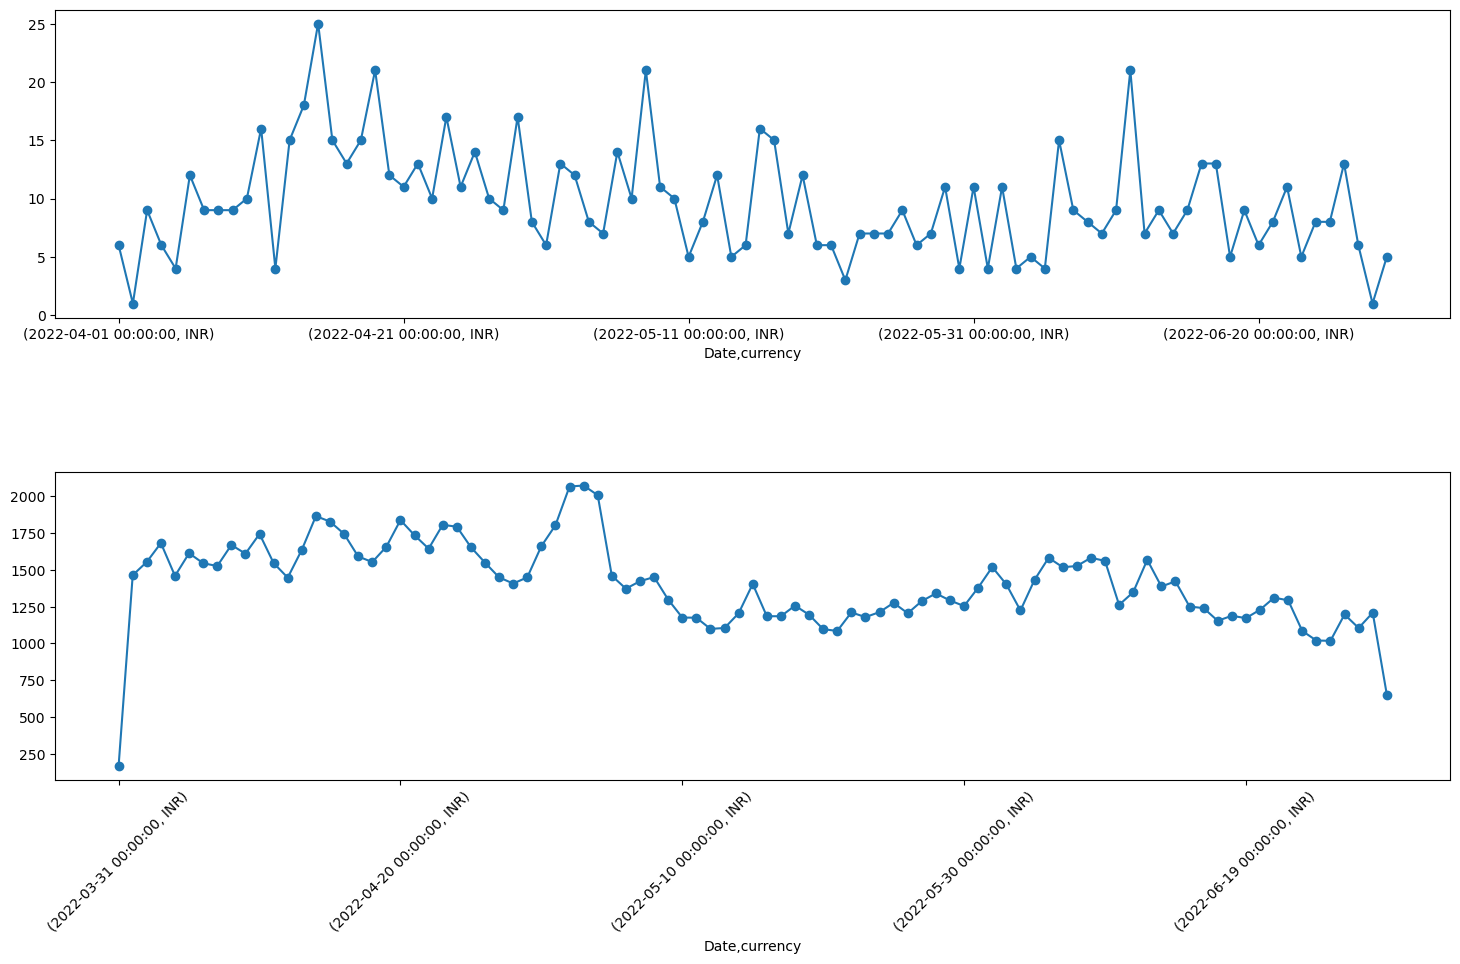

In [146]:
#How do shipping times compare between B2B and B2C orders?Currency & Exchange Rate Effects
fig, axes = plt.subplots(2, 1, figsize = (18, 10))
plt.subplots_adjust(hspace = 0.5)
df[(df['B2B'] == True)].groupby(['Date', 'currency'])['Amount'].count().plot(kind = 'line', ax = axes[0], rot = 0, marker = 'o')
df[(df['B2B'] == False)].groupby(['Date', 'currency'])['Amount'].count().plot(kind = 'line', ax = axes[1], rot = 45, marker = 'o')